# Adam Niewiadomski 
# Tryb studiow: Dzienne
# Grupa: Wtorki 15:20
# Indeks: 116961

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.decomposition import TruncatedSVD, FastICA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


## A) Use 2 other dimensionality reduction techniques (other than PCA nad UMAP) on the digits dataset (2 pts)


### Metoda SVD - Singular Value Decompositionm

In [3]:
SVD=TruncatedSVD(2)
przeksztalcone = SVD.fit_transform(digits.data)

print(przeksztalcone.shape) #dziala, ma 2 wymiary 

(1797, 2)


### ICA: Independent Component Analysis

In [6]:
ICA = FastICA(2)
przeksztalcone1 = ICA.fit_transform(digits.data)

print(przeksztalcone1.shape) #tez zadzialalo, udalo sie zredukowac wymiar

ICA1 = FastICA(5)
przeksztalcone2 = ICA1.fit_transform(digits.data)
print(przeksztalcone2.shape) #Jakbym chcial na inna ilosc wymiarow to tez daje rade 



(1797, 2)
(1797, 5)


C:\Users\komeciu\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\komeciu\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


## B) Use 2 other dimensionality reduction techniques (other than PCA nad UMAP) on the other dataset than digits (2 pts)


In [8]:
iris = load_iris()

x = iris.data
y = iris.target

print(x.shape)

(150, 4)


### Metoda SVD - Singular Value Decompositionm

In [9]:
SVD=TruncatedSVD(2)
x_new =SVD.fit_transform(x)

print(x_new.shape) #dziala ma 2 wymiary 

(150, 2)


### Metoda Factor Analysis 

In [10]:
factor = FactorAnalysis(2)

factor_fit= factor.fit_transform(x)

print(factor_fit.shape) # dziala 

factor2 = FactorAnalysis(3)
factor_fit2= factor2.fit_transform(x)
print(factor_fit2.shape) # dziala 


(150, 2)
(150, 3)


## C) Use 1 other clustering technique on Iris dataset plot the results with UMAP as above (1 pt)

### Wykorzystanie metody DBSCAN

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
x = pd.DataFrame(x)
xx = pd.DataFrame(StandardScaler().fit(x).transform(x))
xx

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [14]:
dbscan = DBSCAN(eps=1.4,min_samples=5) #zmienilem z bazowego 0.5 na 1.4 bo tworzylo sie za duzo grup ktore wygladaly słabo
#w ten sposób otrzymałem dwie hermetyczne grupy, moglbym modyfikowac tez min_sample zeby osiagnac podobny wynik
lab = dbscan.fit(xx).labels_

model = umap.UMAP(random_state=42)
umap_embedding = model.fit(xx).transform(xx)

In [15]:
def plot_reduced_data(embedding, color_col):
    plt.figure(dpi=150)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=color_col, cmap='rainbow', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    n = len(np.unique(color_col))
    plt.colorbar(boundaries=np.arange(n+1)-0.5).set_ticks(np.arange(n)) 

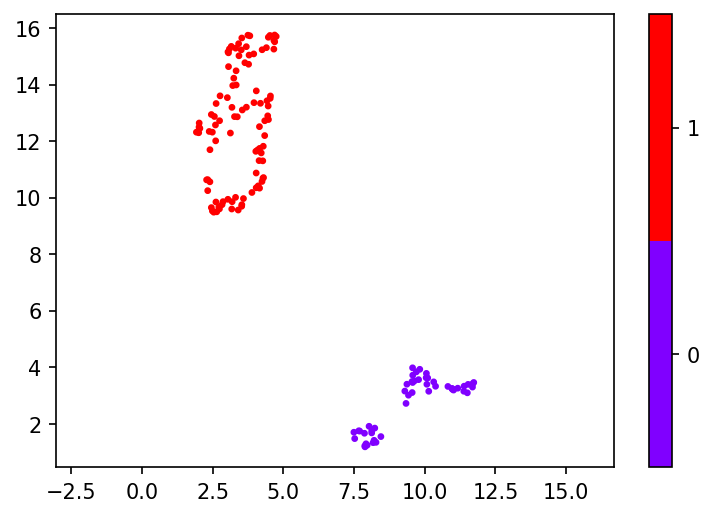

In [16]:
plot_reduced_data(umap_embedding, lab)